In [4]:
def my_func():
    print("hey google!")

print(type(my_func))
id(my_func)

<class 'function'>


2193333570824

Области видимости
=========

 - Имена, определяемые внутри инструкции **def**, видны только программному коду внутри инструкции **def**. К этим именам нельзя обратиться за пределами функции.
 - Имена, определяемые внутри инструкции **def**, не вступают в конфликт с именами, находящимися за пределами инструкции **def**, даже если и там и там присутствуют одинаковые имена.
 - Если присваивание переменной выполняется внутри инструкции **def**, переменная является локальной для этой функции.
 - Если присваивание производится в пределах объемлющей инструкции **def**,переменная является нелокальной для этой функции.
 - Если присваивание производится за пределами всех инструкций **def**, она является глобальной для всего файла.
 
 Поиск имен ведется самое большее в четырех областях видимости: локальной (Local), затем в объемлющей (Enclosing) функции  (если таковая имеется), затем в глобальной (Global) и, наконец, во встроенной (Built-in). Это называется правило **LEGB** поиска имен в областях видимости.
 
 
 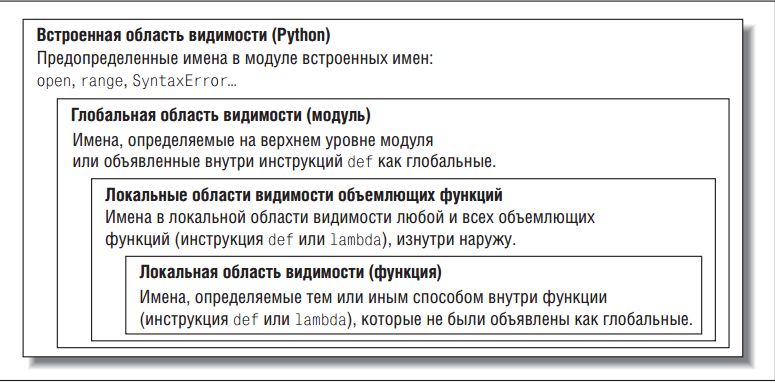
 
 

In [6]:
num = 10

def change_num():
    num = 25
    print(num)

change_num()    
print(num) #((

25
10


Инструкции global и nonlocal
-------

Инструкция **global** и родственная ей инструкция **nonlocal** – единственные инструкции в языке **Python**, отдаленно напоминающие инструкции объявления.
Однако они не объявляют тип или размер – они объявляют  пространства имен. Инструкция **global** сообщает интерпретатору, что функция будет изменять одно или более глобальных имен, то есть имен, которые находятся в области видимости (в пространстве имен) вмещающего модуля.

 Инструкция **global** позволяет изменять переменные, находящиеся на верхнем уровне модуля, за пределами инструкции **def**
Пример: изменим функцию выше

In [7]:
num = 10
def change_num():
    global num
    num = 25
    print(num)

change_num()
print(num)

25
25


In [10]:
y, z = 1, 2            # Глобальные переменные в модуле
def all_global():
    global x           # Объявляется глобальной для присваивания
    x = y + z          # Объявлять y, z не требуется: применяется правило LEGB
    print(x)
    
all_global()  
print(x)

3
3


  **Обратите внимание**: переменные **y  и z** не были объявлены как глобальные, однако, следуя правилу LEGB, интерпретатор автоматически отыщет их в области видимости модуля.
  
  **Минимизируйте количество глобальных переменных**
  Да, может быть удобно, но если можно обойтись без глобальной - то обходимся.
  
  пример:

In [11]:
X = 99
def func1():
    global X
    X = 88
def func2():
    global X
    X = 77

 и вот как потом понять, какое значение будет у Х)))

Инструкции **nonlocal** дает вложенной функции возможность присваивать переменным, объявленным в объемлющих функций, новые значения.

**nonlocal** ограничивает область поиска областями видимости объемлющих
функций; она требует, чтобы перечисленные в инструкции имена уже существовали, и позволяет присваивать им новые значения. В область поиска
не входят глобальная и встроенная области видимости.

Проще сразу на примере:

In [14]:
def tester(start):
    state = start           # Обращение к нелокальным переменным
    def nested(label):      # действует как обычно
        print(label, state) # Извлекает значение state из области
        state += 1          # Без nonlocal выдаст ошибку
    return nested           # видимости объемлющей функции

F = tester(0)
F('spam')
F('ham')


UnboundLocalError: local variable 'state' referenced before assignment

In [1]:
def tester(start):
    state = start           # В каждом вызове сохраняется свое значение state
    def nested(label):      
        nonlocal state
        print(label, state) 
        state += 1          
    return nested           

F = tester(0)
F('spam')
F('ham')
tester(0)("sdfsd")

spam 0
ham 1
sdfsd 0


Важно не упускать из виду, что в отличие от имен,
перечисленных в инструкции **global**, имена в инструкции **nonlocal** к моменту объявления уже должны существовать в области видимости объемлющей функции, в противном случае интерпретатор возбудит исключение

Замыкание или фабричные функции
-----

Для начала обратимся к википедии: “замыкание (closure) в программировании — это функция, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся ее параметрами.” 

Как уже говорилось, каждый раз, когда вызывается функция, создаются локальные переменные (если они есть), а после завершения – уничтожаются, при очередном вызове эта процедура повторяется. Можно ли сделать так, чтобы после завершения работы функции, часть локальных переменных не уничтожалась, а сохраняла свои значение до следующего запуска? Да, это можно сделать!

Локальная переменная не будет уничтожена, если на нее где-то останется “живая” ссылка, после завершения работы функции. Эту ссылку может сохранять вложенная функция. Функции построенные по такому принципу могут использоваться для построения специализированных функций, т.е. являются фабриками функций. 

Рассмотрим это на примере:

In [9]:
def some_info():
    x = ["Hi","so boring", '^_^']
    def inner():
        print(x)
        print(id(x))
    return inner

si = some_info()
si()

['Hi', 'so boring', '^_^']
3055636620552


Теперь самое интересное. Объект **х** существует в глобальной области памяти и к нему можно получить доступ. Напомню, что в python все является объектами. И функции тоже. Мы еще не затрагивали рсобо работу с  атрибутами объектов, однако попробуем всеже разобраться

In [10]:
dir(si)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Нам понадобится атрибут '\_\_closure\_\_':

In [12]:
si.__closure__

(<cell at 0x000002C771F9A1F8: list object at 0x000002C77222A508>,)

In [11]:
si.__closure__[0].cell_contents

['Hi', 'so boring', '^_^']

In [13]:
a = si.__closure__[0].cell_contents
a.append((1,2))
si()

['Hi', 'so boring', '^_^', (1, 2)]
3055636620552


Как видим это тот же самый объект, который был определен в локальной области видимости, а теперь доступен в глобальной области видимости. Это возможно из-за того, что на объект **х** сохранились ссылки.

Разумеется такую функциональность проще реализовать и нагляднее используя классы. Однако, еще в начале лекций упоминалось, что на языке Python есть возжность реализовывать код в стиле функционального программирования. Вот как раз это замыкание пришло из функциональных языков.

Рассмотрим еще пример:

In [15]:
def maker(N):
    def action(X): # Создать и вернуть функцию
        return X ** N # Функция action запоминает значение N в объемлющей
    return action # области видимости

maker(2)(3)

9

Теперь опять сохраним ссылку на объект:

In [16]:
a = maker(3)
a(2)

8

In [17]:
b = maker(2)
b(3)

9

Источники:
1. Изучаем Python, 4-е изд. - [Лутц]
2. https://devpractice.ru/closures-in-python/
3. https://www.youtube.com/watch?v=wKyUZY4-Dxc

********
Теперь немного из книги рецептов. Мы как-то сталкивались с тем, что хотелось бы использовать функцию, но допустим у нее слишком много параметров. Вот вам рецепт:

Заставляем вызывамый объект с N аргументами работать так же, как вызываемый объект с меньшим количеством аргументов
### Задача
У вас есть вызываемый объект, который вы хотели бы использовать в какой-то программе Python — возможно, в качестве функции обратного вызова (коллбэка) или обработчика (хэндлера), но он принимает слишком много аргументов и при вызове возбуждает исключение.

### Решение
Если вам нужно уменьшить количество аргументов функции, используйте **functools.partial()**. Функция **partial()** позволяет присваивать фиксированные значения одному или более аргументам, что уменьшает количество аргументов, которые должны быть переданы в последующих вызовах. Например, у вас есть вот такая функция:

In [19]:
def spam(a, b, c, d):
    print(a, b, c, d)
    
from functools import partial
s1 = partial(spam, 1)
s1(2, 3, 4)

1 2 3 4


In [20]:
s2 = partial(spam, d=42)
s2(1, 2, 3)

1 2 3 42


а в книге есть еще примеры и поинтереснее))